## Plot the data set and temperature values

In [2]:
#!/usr/bin/env python
import matplotlib.pyplot as plt

import numpy as np
import csv

import lightning.pytorch as pl

# seed everything
pl.seed_everything(0)



file_path = "./biotac_single_contact_response/2018-01-19-18-16-58_biotac_ff_stick_calibration.bag.csv"

reader = csv.reader(open(file_path))
rows = [row for row in reader]


data_columns = [7, 8, 9 ,10, 11] + list(range(12, 31))

headers_out = np.array(rows[0])[data_columns].tolist()

rows = rows[1:]
data = np.array(rows).astype(float)


#closest_points = np.load('stick_closest_points.npy', allow_pickle=True)
# chnage the x,y,z with closest_points
#data[:,1:4] = closest_points


distances=np.sqrt(np.sum((data[:,1:4])**2,axis=1))
last_position = [[np.array((0,0,0))] for k in range(10)] # placeholder: first window values are 0 they will be deleted anyway 
for i in range(10,len(distances)):
    j=1
    while j < 10:
        if (abs(data[i][1]-data[i-j][1]) > 1e-6) or (abs(data[i][2]-data[i-j][2]) > 1e-6) or (abs(data[i][3]-data[i-j][3]) > 1e-6) :
            last_position.append([data[i-j,1:4]])
            break
        j+=1
    if j == 10:
        last_position.append([data[i-j,1:4]])
last_position = np.array(last_position).squeeze()

next_position = []
for i in range(0,len(distances)-10):
    j=1
    while j < 10:
        if (abs(data[i][1]-data[i+j][1]) > 1e-6) or (abs(data[i][2]-data[i+j][2]) > 1e-6) or (abs(data[i][3]-data[i+j][3]) > 1e-6) :
            next_position.append([data[i+j,1:4]])
            break
        j+=1
    if j == 10:
        next_position.append([data[i+j,1:4]])
# placeholder: last window values are 0 they will be deleted anyway 
for k in range(10):
    next_position.append([np.array((0,0,0))])
next_position = np.array(next_position).squeeze()


data_in = np.hstack((
    data[:,1:4],
    data[:,4:7]
    
    #last_position,
    #*[np.roll(data[:,4:7], -i, axis=0) for i in range(-10, 1)],
))   # pos(t) , forces (t-10) ,... forces (t-1), forces (t)   # 10 windows of forces



data_out = data[:,data_columns]


#correct the first and last 10 samples
# TODO: Adjust window size +10 everywhere
data_in = data_in[10:-10]
data_out = data_out[10:-10]

in_cols = data_in.shape[1]
out_cols = data_out.shape[1]

Seed set to 0


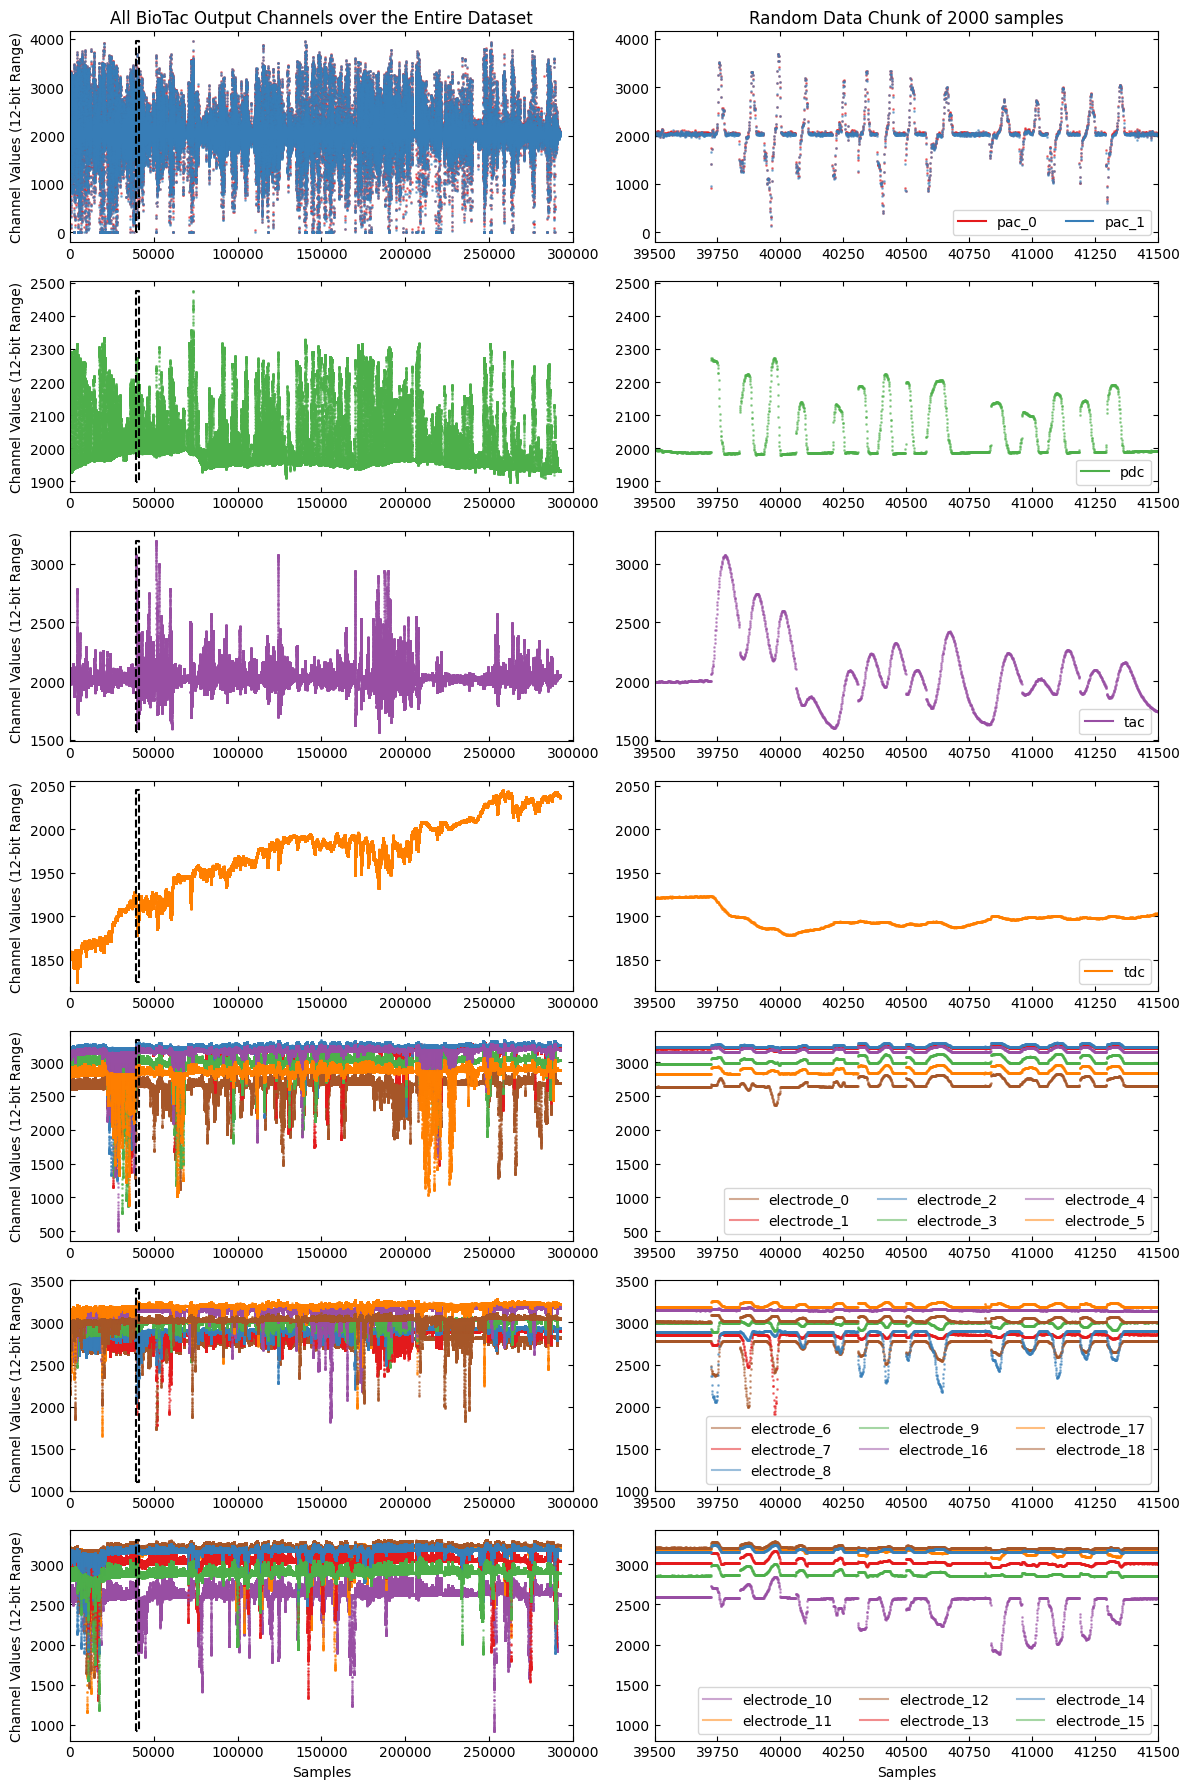

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(7, 2, figsize=(12, 18))



plot_map={0:[0,1], 1:[2], 2:[3], 3:[4],  4:[5,6,7,8,9,10], 5:[11,12,13,14,21,22,23], 6:[15,16,17,18,19,20],}

# pick 6 different colors without yellow

color_map = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#a65628"]


limit=39500
length=2000
for ind in range(data_out.shape[1]):
    color = plt.cm.Set1((ind//6)/(6))

    # check if ind is in plot_map
    if ind in plot_map[0]:
        axs[0,0].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        if ind==0:
            axs[0,0].plot([],[],"-", label="pac_0", color=color_map[ind%6])
        elif ind==1:
            axs[0,0].plot([],[],"-", label="pac_1", color=color_map[ind%6])
    # plot square to show the samples
    if ind in plot_map[1]:
        axs[1,0].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        if ind==2:
            axs[1,0].plot([],[],"-", label="pdc", color=color_map[ind%6])
    if ind in plot_map[2]:
        axs[2,0].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        if ind==3:
            axs[2,0].plot([],[],"-", label="tac", color=color_map[ind%6])
    if ind in plot_map[3]:
        axs[3,0].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        if ind==4:
            axs[3,0].plot([],[],"-", label="tdc", color=color_map[ind%6])
            # plot line y= 1968.7501505817934 (mean value of tdc used in the paper)
            #axs[3,0].plot([0, data_out_unscaled_stick.shape[0]], [1968.7501505817934, 1968.7501505817934], "--", color="black")
    if ind in plot_map[4]:
        axs[4,0].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        axs[4,0].plot([],[],"-", label="electrode_"+str(ind-5), color=color_map[ind%6],alpha=0.5)
    if ind in plot_map[5]:
        axs[5,0].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        axs[5,0].set_ylim([1000,3500])
        axs[5,0].plot([],[],"-", label="electrode_"+str(ind-5), color=color_map[ind%6],alpha=0.5)

    if ind in plot_map[6]:
        axs[6,0].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        axs[6,0].plot([],[],"-", label="electrode_"+str(ind-5), color=color_map[ind%6],alpha=0.5)


axs[0,0].set_title("All BioTac Output Channels over the Entire Dataset")

for i in range(7):
    max_value = np.max(data_out[:,plot_map[i]])
    min_value = np.min(data_out[:,plot_map[i]])
    if i==5:
        max_value=3400
        min_value=1100
    axs[i,0].plot([limit,limit,limit+length,limit+length,limit], [min_value,max_value,max_value,min_value,min_value],"--" ,color="black")

for ind in range(data_out.shape[1]):
    color = plt.cm.Set1((ind//6)/(6))

    # check if ind is in plot_map
    if ind in plot_map[0]:
        axs[0,1].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        if ind==0:
            axs[0,1].plot([],[],"-", label="pac_0", color=color_map[ind%6])
        elif ind==1:
            axs[0,1].plot([],[],"-", label="pac_1", color=color_map[ind%6])
    if ind in plot_map[1]:
        axs[1,1].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        if ind==2:
            axs[1,1].plot([],[],"-", label="pdc", color=color_map[ind%6])
    if ind in plot_map[2]:
        axs[2,1].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        if ind==3:
            axs[2,1].plot([],[],"-", label="tac", color=color_map[ind%6])
    if ind in plot_map[3]:
        axs[3,1].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        if ind==4:
            axs[3,1].plot([],[],"-", label="tdc", color=color_map[ind%6])
    if ind in plot_map[4]:
        axs[4,1].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        axs[4,1].plot([],[],"-", label="electrode_"+str(ind-5), color=color_map[ind%6],alpha=0.5)

    if ind in plot_map[5]:
        axs[5,1].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        axs[5,1].set_ylim([1000,3500])
        axs[5,1].plot([],[],"-", label="electrode_"+str(ind-5), color=color_map[ind%6],alpha=0.5)

    if ind in plot_map[6]:
        axs[6,1].plot(data_out[:,ind], "o", ms=1, color=color_map[ind%6],alpha=0.5)
        axs[6,1].plot([],[],"-", label="electrode_"+str(ind-5), color=color_map[ind%6],alpha=0.5)



axs[0,1].set_title("Random Data Chunk of "+str(length)+" samples")
for i in range(7):
    axs[i,1].set_xlim([limit,limit+length])
    axs[i,1].legend(loc = 'lower right', ncol=3)
    axs[i,1].tick_params(bottom=True, top=True, left=True, right=True)
    axs[i,1].tick_params(axis='x', which='both', direction='in')
    axs[i,1].tick_params(axis='y', which='both', direction='in')
    #axs[i,1].set_ylabel("Channel Values (12-bit Range)")
axs[6,1].set_xlabel("Samples")

for i in range(7):
    axs[i,0].set_xlim([0,300000])
    axs[i,0].tick_params(bottom=True, top=True, left=True, right=True)
    axs[i,0].tick_params(axis='x', which='both', direction='in')
    axs[i,0].tick_params(axis='y', which='both', direction='in')
    axs[i,0].set_ylabel("Channel Values (12-bit Range)")

axs[6,0].set_xlabel("Samples")
    
plt.tight_layout()
#plt.savefig("./figures/BioTac_Dataset_300dpi.pdf", dpi=300)

plt.show()


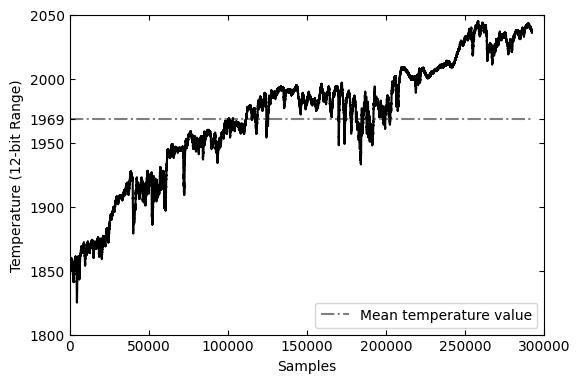

In [4]:

plt.rcParams.update({'font.size': 10})


# figure with 4 subplots
cm = 1/2.54 
fig, axs = plt.subplots(1, 1, figsize=(15*cm, 10*cm))
plot_map={0:[0,1], 1:[2], 2:[3], 3:[4],  4:[5,6,7,8,9,10], 5:[11,12,13,14,21,22,23], 6:[15,16,17,18,19,20],}

# pick 6 different colors without yellow

color_map = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#a65628"]


axs.plot(data_out[:,4], "-", ms=1, color="k",)

#axs.set_title("Temperature Readings over the Entire Dataset")
#plt.legend(loc = 'lower right')
axs.plot([0, data_out.shape[0]],[1968.7501505817934]*2, color='black', alpha=0.5, linestyle='-.', label="Mean temperature value")

axs.tick_params(bottom=True, top=True, left=True, right=True)
axs.tick_params(axis='x', which='both', direction='in')
axs.tick_params(axis='y', which='both', direction='in')

plt.yticks(list(plt.yticks()[0]) +[1968.7501505817934])
axs.get_yticklabels()[-1].set_color('k')
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

axs.set_xlabel("Samples")
axs.set_ylabel("Temperature (12-bit Range)")
axs.set_ylim([1800, 2050])
axs.set_xlim([0, 300000])
plt.tight_layout()

plt.legend(loc = 'lower right')
#plt.savefig("./figures/Temperature_values_300dpi.pdf", dpi=300, bbox_inches='tight' )

plt.show()


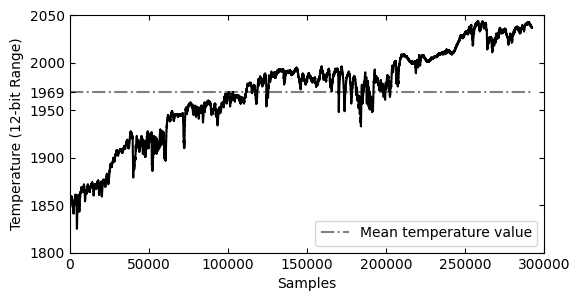

In [5]:
# resample data_out[:,4] with 10 steps to have compacter pdf file

resampled_temperature = data_out[:,4,][::10] 
# repeate value
resampled_temperature = np.repeat(resampled_temperature, 10)


import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 10})


# figure with 4 subplots
cm = 1/2.54 
fig, axs = plt.subplots(1, 1, figsize=(15*cm, 10*cm))
plot_map={0:[0,1], 1:[2], 2:[3], 3:[4],  4:[5,6,7,8,9,10], 5:[11,12,13,14,21,22,23], 6:[15,16,17,18,19,20],}

# pick 6 different colors without yellow

color_map = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#a65628"]


axs.plot(resampled_temperature, "-", ms=1, color="k",)

#axs.set_title("Temperature Readings over the Entire Dataset")
#plt.legend(loc = 'lower right')
axs.plot([0, data_out.shape[0]],[1968.7501505817934]*2, color='k', alpha=0.5, linestyle='-.', label="Mean temperature value")

axs.tick_params(bottom=True, top=True, left=True, right=True)
axs.tick_params(axis='x', which='both', direction='in')
axs.tick_params(axis='y', which='both', direction='in')

plt.yticks(list(plt.yticks()[0]) +[1968.7501505817934])
axs.get_yticklabels()[-1].set_color('k')
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

axs.set_xlabel("Samples")
axs.set_ylabel("Temperature (12-bit Range)")
axs.set_ylim([1800, 2050])
axs.set_xlim([0, 300000])
plt.tight_layout()

plt.legend(loc = 'lower right')


# set aspect ratio between x and y axis to 2
ax = plt.gca()
ax.set_aspect(0.5/ax.get_data_ratio())

# tight 
plt.tight_layout()
#plt.savefig("./figures/Temperature_values_300dpi_resampled10steps.pdf", dpi=300, bbox_inches='tight')


plt.show()


## Calculate and plot the histogram of near electrodes to each contact point

In [6]:
# values from Lin et al. 2013: “Estimating point of contact, force and torque in a biomimetic tactile sensor with deformable skin,”

electrode_pos=np.array([[ 0.993, -4.855, -1.116, 0.196, -0.956, -0.220],
[ -2.700, -3.513 ,-3.670, 0.000, -0.692, -0.722],
[ -6.200, -3.513, -3.670, 0.000, -0.692, -0.722],
[ -8.000, -4.956, -1.116, 0.000, -0.976, -0.220],
[ -10.500, -3.513, -3.670, 0.000, -0.692, -0.722],
[ -13.400, -4.956, -1.116, 0.000, -0.976, -0.220],
[ 4.763, 0.000, -2.330, 0.500, 0.000, -0.866],
[ 3.031, -1.950, -3.330, 0.500, 0.000, -0.866],
[ 3.031, 1.950, -3.330, 0.500, 0.000, -0.866],
[ 1.299, 0.000, -4.330, 0.500, 0.000, -0.866],
[ 0.993, 4.855, -1.116, 0.196, 0.956, -0.220],
[ -2.700, 3.513, -3.670, 0.000, 0.692, -0.722],
[ -6.200, 3.513, -3.670, 0.000, 0.692, -0.722],
[ -8.000, 4.956, -1.116, 0.000, 0.976, -0.220],
[ -10.500, 3.513, -3.670, 0.000, 0.692, -0.722],
[ -13.400, 4.956, -1.116, 0.000, 0.976, -0.220],
[ -2.800, 0.000, -5.080, 0.000, 0.000, -1.000],
[ -9.800, 0.000, -5.080, 0.000, 0.000, -1.000],
[ -13.600, 0.000, -5.080, 0.000, 0.000, -1.000],])

electrode_pos[:,:3]=electrode_pos[:,:3]/1000

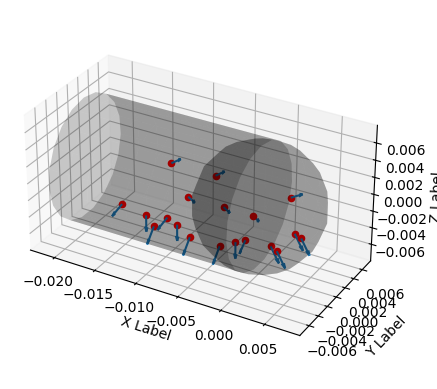

In [7]:

#%matplotlib widget
# 3d plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for i in electrode_pos:
    ax.scatter(i[0], i[1], i[2], c='r', marker='o')
    # plot the normal vector of the electrode
    ax.quiver(i[0], i[1], i[2], i[3], i[4], i[5], length=0.002, normalize=True)

# show axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


# plot a sphere with radius 0.007 and center (0,0,0)
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)*0.007
y = np.sin(u)*np.sin(v)*0.007
z = np.cos(v)*0.007
ax.plot_surface(x, y, z, color="k", alpha=0.2)   

# plot a cylinder with height 0.021, radius 0.007 and center (- 0.021,0,0)
u, v = np.mgrid[0:2*np.pi:20j, 0:0.021:10j]
x = v - 0.007*3
y = np.sin(u)*0.007 
z = np.cos(u)*0.007
ax.plot_surface(x, y, z, color="k",alpha=0.2) 

# axes equal
ax.set_aspect("equal")

plt.show()


In [8]:
"""     
Init values for the BioTac

pac0: 2042
pac1: 2024
pac: []
pdc: 1973
tac: 2250
tdc: 0
electrodes: [2668, 3224, 3239, 3003, 3165, 2849, 2798, 2873, 2912, 3017, 2605, 3202, 3221, 3025, 3164, 2874, 3158, 3203, 3026] 
""";


In [9]:
distances=[]
for i in range(len(data_in)):
    if data_in[i][0]>0:
        distances.append(np.sqrt(np.sum((data_in[i,0:3])**2)))
    else:
        distances.append(np.sqrt(np.sum((data_in[i,1:3])**2))) 
distances=np.array(distances)
# calcualte norm of forces
force_norms = np.linalg.norm(data_in[:,3:6], axis=1)

In [10]:
index_touch = np.where((force_norms > 0.3) & (distances<0.009))[0]
print(len(index_touch))

23527


In [11]:
index_touch=[]
contact_flag=False
prev_contact_flag=False
#prev_prev_contact_flag=False
#prev_prev_prev_contact_flag=False
#prev_prev_prev_prev_contact_flag=False
for i in range(len(data_in)):
    contact_flag = (force_norms[i] > 0.3) and (distances[i]<0.009)
    if (not contact_flag) and  ( prev_contact_flag) : #and not prev_prev_contact_flag and prev_prev_prev_contact_flag and prev_prev_prev_prev_contact_flag:
        index_touch.append(i-1)
    #prev_prev_prev_prev_contact_flag = prev_prev_prev_contact_flag
    #prev_prev_prev_contact_flag=prev_prev_contact_flag
    #prev_prev_contact_flag=prev_contact_flag
    prev_contact_flag=contact_flag

index_touch=np.array(index_touch)
len(index_touch)

868

In [12]:
contact_near_electrode = []
for i in index_touch:
    contact_near_electrode.append(np.argmin(np.linalg.norm(data_in[i,0:3]-electrode_pos[:,:3], axis=1))+1)

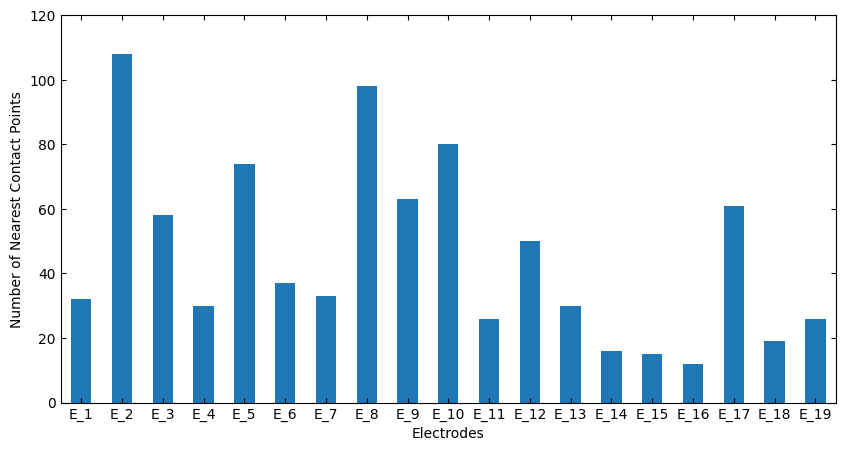

In [13]:
fig = plt.figure(figsize=(10,6))

plt.hist(contact_near_electrode, bins=19, range=(1,20), rwidth=0.5, align='left')
plt.xticks(np.arange(1, 20, 1))
# add E to xticks
xticks = plt.xticks()[0]
xticks_labels = ['E_{}'.format(i) for i in range(1,20)]
plt.xticks(xticks, xticks_labels)

plt.xlabel('Electrodes')
plt.ylabel('Number of Nearest Contact Points')

# xlim
plt.xlim(0.5, 19.5)
plt.ylim(0, 120)

plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis='x', which='both', direction='in')
plt.tick_params(axis='y', which='both', direction='in')

# set aspect ratio between x and y axis to 2
ax = plt.gca()
ax.set_aspect(0.5/ax.get_data_ratio())

#plt.savefig('./figures/contact_near_electrode.pdf', dpi=300, bbox_inches='tight')

plt.show()